### Zoucha, Michael
### Final Project
### 21 March 2022

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import model_selection
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB as mnb
from sklearn.svm import LinearSVC as lsvc
from sklearn.neighbors import KNeighborsClassifier as knn
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn import feature_selection

In [2]:
general_df = pd.read_csv(r'C:\Users\michaelzoucha\OneDrive - Bellevue University\DSC 630 - Predictive Analytics\DSC630\Final Project\Data Files\ibm_general_data.csv')

general_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,8,1,10,3,3,10,7,1,7
1,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,8,0,8,3,3,8,7,3,0
2,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,8,1,6,3,3,2,2,2,2
3,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,8,0,8,2,2,7,7,3,6
4,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,8,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,23,1,Travel_Frequently,638,Sales,9,3,Marketing,1,2023,...,1,8,1,1,3,2,1,0,1,0
1466,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,2027,...,2,8,3,4,3,4,2,2,2,2
1467,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,1,2032,...,4,8,1,14,4,1,10,9,9,8
1468,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,1,2044,...,4,8,2,12,3,3,6,3,0,1


### EDA - Categorical

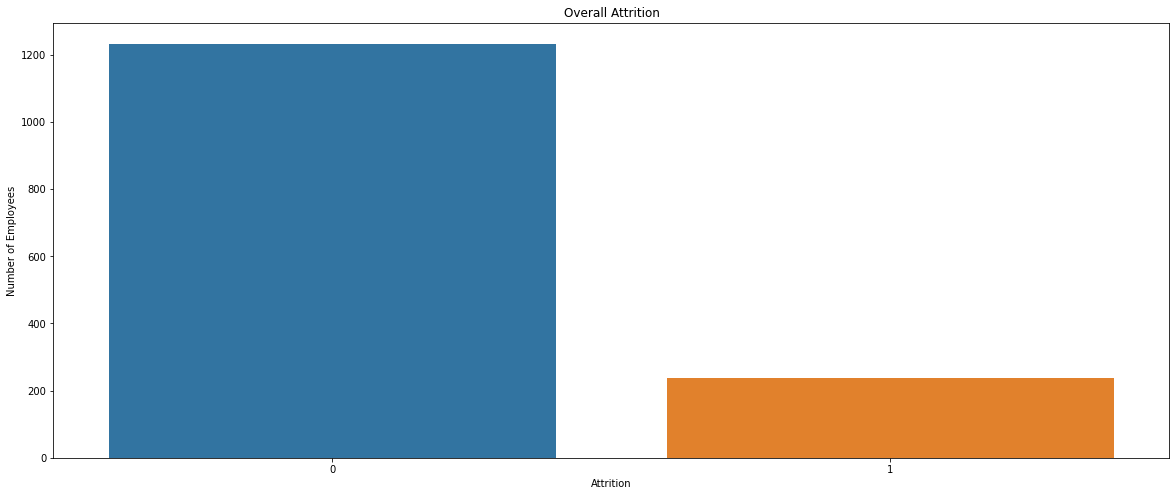

Attrition Rate: 16.1%


In [3]:
## Plot size parameter
plt.rcParams['figure.figsize'] = (20, 8)

## Create new data frame for plot
graph_df = general_df[['Attrition', 'EmployeeCount']].groupby(['Attrition'], as_index=False).sum()

## Create bar plot
sn.barplot(data=graph_df, x='Attrition', y='EmployeeCount')

## Add titles and labels
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Overall Attrition')
plt.show()

print("Attrition Rate: " + str(round(((237/1470) * 100), 1)) + "%")

AS we can see from the plot above, we have a major imbalance of our target class, attrition, with 84% of the data covering employees that haven't left the company and only 16% that have, that could very easily affect the performance of the model if not handled correctly. Since there are so few records for employees that have left, down sampling would significantly reduce the size of the data set and in turn accuracy, so I will more than likely be doing up-sampling 0r a combination of the two.

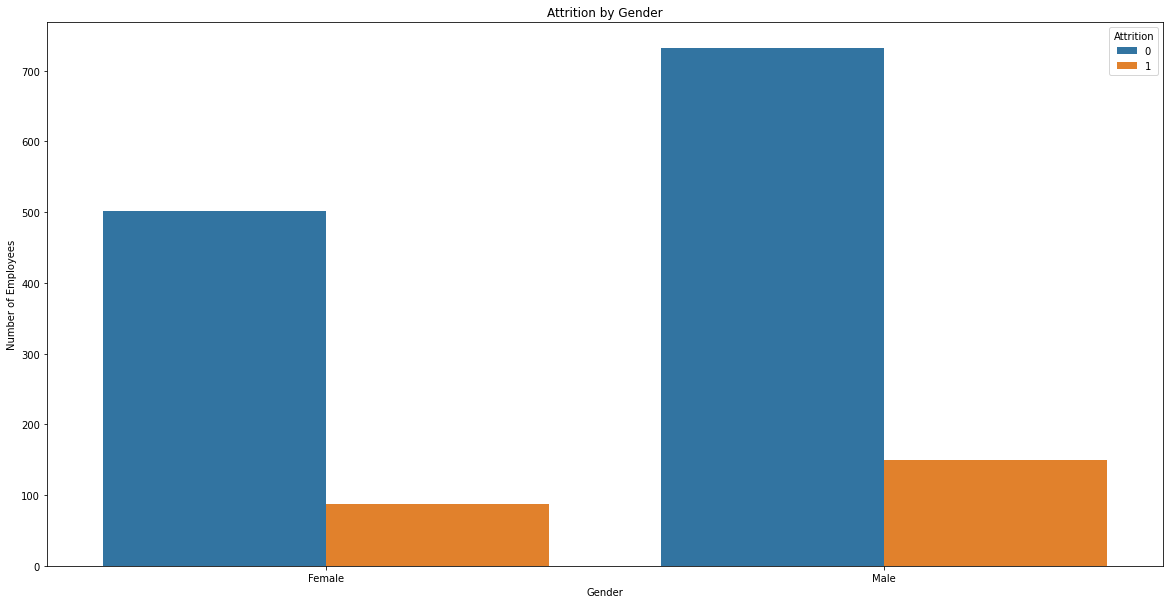

Attrition Rate:
Male - 18.0%
Female - 14.8%


In [4]:
plt.rcParams["figure.figsize"] = (20,10)

## Create new data frame for plot
graph_df = general_df[['Attrition', 'Gender', 'EmployeeCount']].groupby(['Attrition', 'Gender'], as_index=False).sum()

## Create bar plot
sn.barplot(data=graph_df, x='Gender', y='EmployeeCount', hue='Attrition')

## Add titles and labels
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.title('Attrition by Gender')
plt.show()

print("Attrition Rate:")
print("Male - " + str(round((150/832) * 100, 1)) + '%')
print("Female - " + str(round((87/588) * 100, 1)) + '%')

This graph shows the attrition rate for males is about 20% higher than that of females.

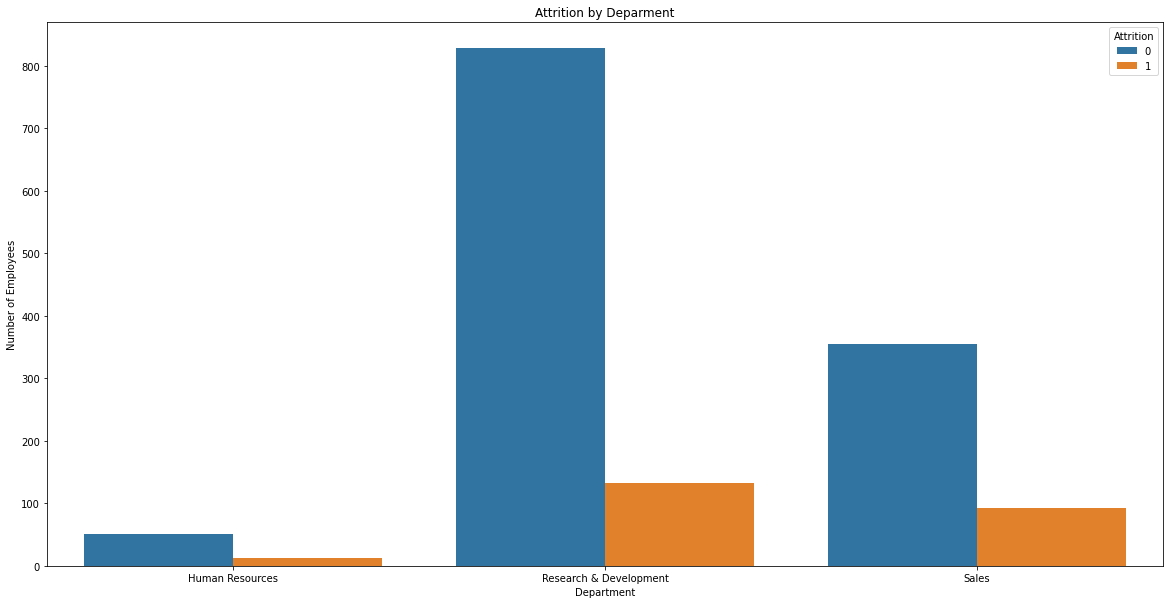

Attrition Rate:
Human Resources - 19.0%
Research & Development - 13.8%
Sales - 20.6%


In [5]:
## Create new data frame for plot
graph_df = general_df[['Attrition', 'Department', 'EmployeeCount']].groupby(['Attrition', 'Department'], as_index=False).sum()

## Create bar plot
sn.barplot(data=graph_df, x='Department', y='EmployeeCount', hue='Attrition')

## Add titles and labels
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.title('Attrition by Deparment')
plt.show()

print("Attrition Rate:")
print("Human Resources - " + str(round((12/63) * 100, 1)) + '%')
print("Research & Development - " + str(round((133/961) * 100, 1)) + '%')
print("Sales - " + str(round((92/446) * 100, 1)) + '%')

This plot shows that Research and Development has the lowest relative attrition rate of all 3 of the departments, while sales has the highest by a very slim margin over Human Resources.

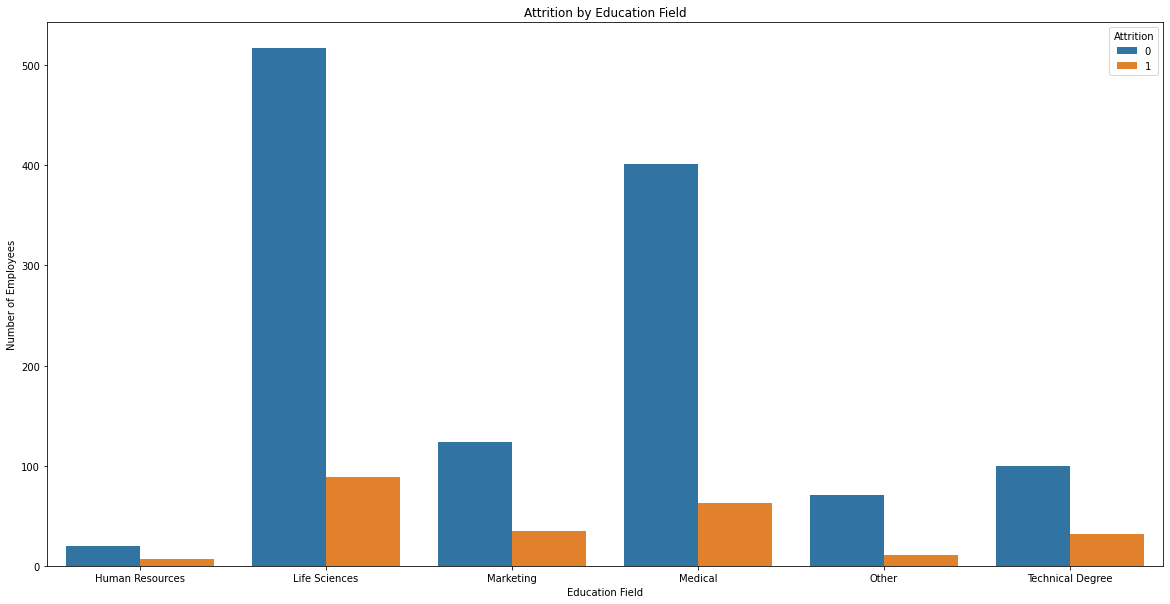

Attrition Rate:
Human Resources - 25.9%
Life Sciences - 14.2%
Marketing - 22.0%
Medical - 13.6%
Other - 13.4%
Technical Degree - 24.2%


In [6]:
## Create new data frame for plot
graph_df = general_df[['Attrition', 'EducationField', 'EmployeeCount']].groupby(['Attrition', 'EducationField'], as_index=False).sum()

## Create bar plot
sn.barplot(data=graph_df, x='EducationField', y='EmployeeCount', hue='Attrition')

## Add titles and labels
plt.xlabel('Education Field')
plt.ylabel('Number of Employees')
plt.title('Attrition by Education Field')
plt.show()

print("Attrition Rate:")
print("Human Resources - " + str(round((7/27) * 100, 1)) + '%')
print("Life Sciences - " + str(round((86/606) * 100, 1)) + '%')
print("Marketing - " + str(round((35/159) * 100, 1)) + '%')
print("Medical - " + str(round((63/464) * 100, 1)) + '%')
print("Other - " + str(round((11/82) * 100, 1)) + '%')
print("Technical Degree - " + str(round((32/132) * 100, 1)) + '%')

The education field with the highest attrition rate is Human Resources, with 'technical degree' in second and marketing in third.

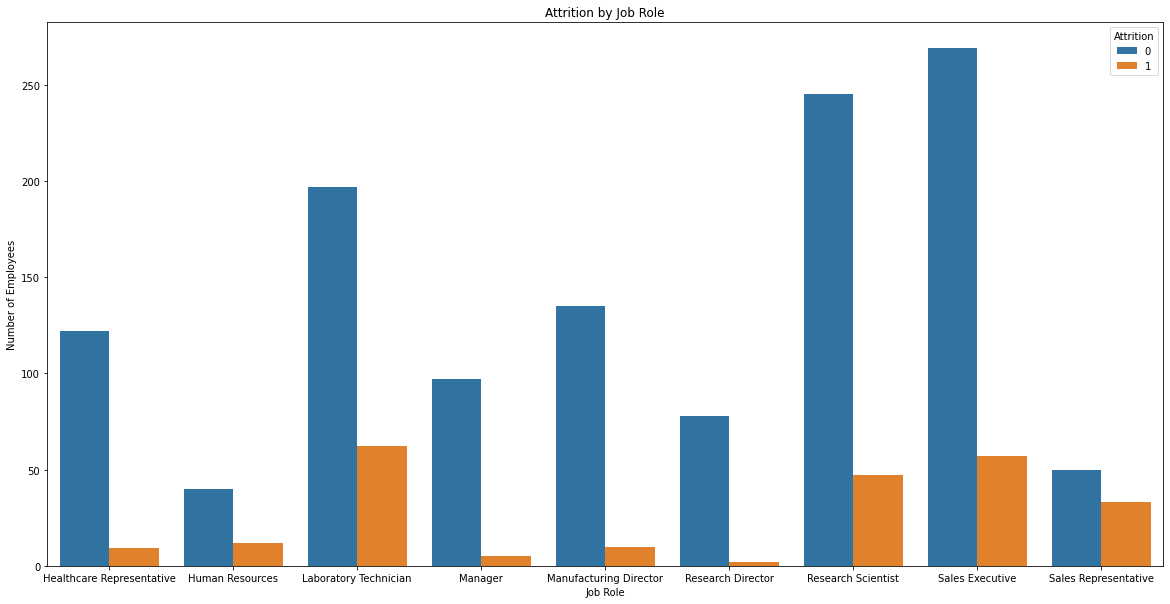

Attrition Rate:
Healthcare Representative - 6.9%
Human Resources - 23.1%
Laboratory Technician - 23.9%
Manager - 4.9%
Manufacturing Director - 6.9%
Research Director - 2.5%
Research Scientist - 16.1%
Sales Executive - 17.5%
Sales Representative - 39.8%


In [7]:
## Create new data frame for plot
graph_df = general_df[['Attrition', 'JobRole', 'EmployeeCount']].groupby(['Attrition', 'JobRole'], as_index=False).sum()

## Create bar plot
sn.barplot(data=graph_df, x='JobRole', y='EmployeeCount', hue='Attrition')

## Add titles and labels
plt.xlabel('Job Role')
plt.ylabel('Number of Employees')
plt.title('Attrition by Job Role')
plt.show()

print("Attrition Rate:")
print("Healthcare Representative - " + str(round((9/131) * 100, 1)) + '%')
print("Human Resources - " + str(round((12/52) * 100, 1)) + '%')
print("Laboratory Technician - " + str(round((62/259) * 100, 1)) + '%')
print("Manager - " + str(round((5/102) * 100, 1)) + '%')
print("Manufacturing Director - " + str(round((10/145) * 100, 1)) + '%')
print("Research Director - " + str(round((2/80) * 100, 1)) + '%')
print("Research Scientist - " + str(round((47/292) * 100, 1)) + '%')
print("Sales Executive - " + str(round((57/326) * 100, 1)) + '%')
print("Sales Representative - " + str(round((33/83) * 100, 1)) + '%')

As we can see, sales representatives have a significantly higher attrition rate than any other role in this dataset and research directors have the lowest, by a lot.

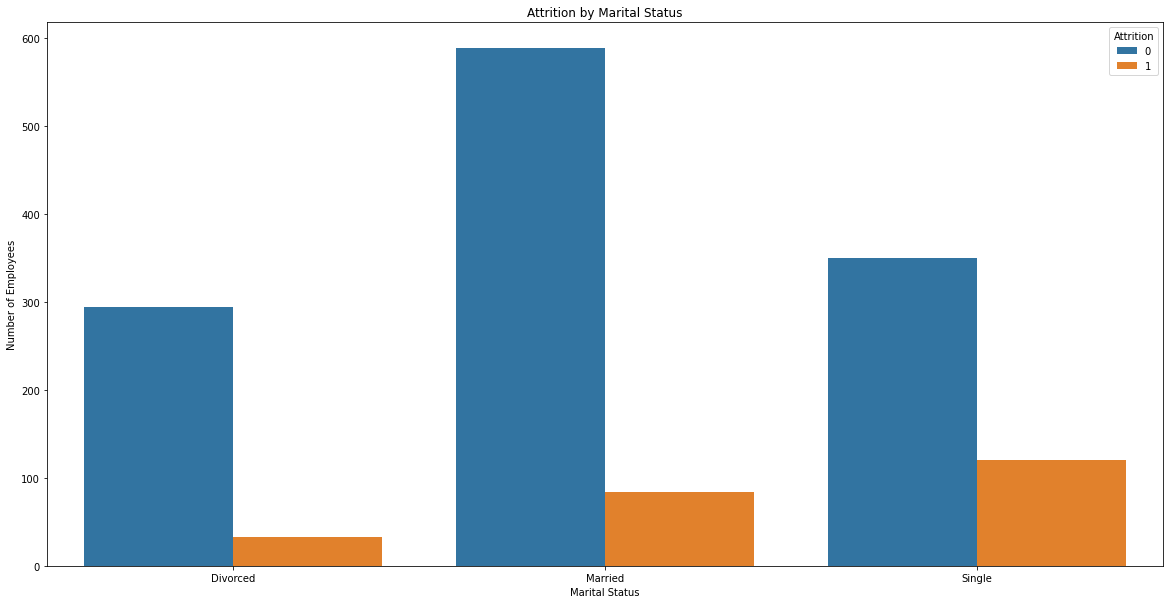

Attrition Rate:
Divorced - 10.1%
Married - 12.5%
Single - 25.5%


In [8]:
## Create new data frame for plot
graph_df = general_df[['Attrition', 'MaritalStatus', 'EmployeeCount']].groupby(['Attrition', 'MaritalStatus'], as_index=False).sum()

## Create bar plot
sn.barplot(data=graph_df, x='MaritalStatus', y='EmployeeCount', hue='Attrition')

## Add titles and labels
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.title('Attrition by Marital Status')
plt.show()

print("Attrition Rate:")
print("Divorced - " + str(round((33/327) * 100, 1)) + '%')
print("Married - " + str(round((84/673) * 100, 1)) + '%')
print("Single - " + str(round((120/470) * 100, 1)) + '%')

Singles have more than double the attrition rate than that of employees that have been or are currently married.

### EDA - Numeric

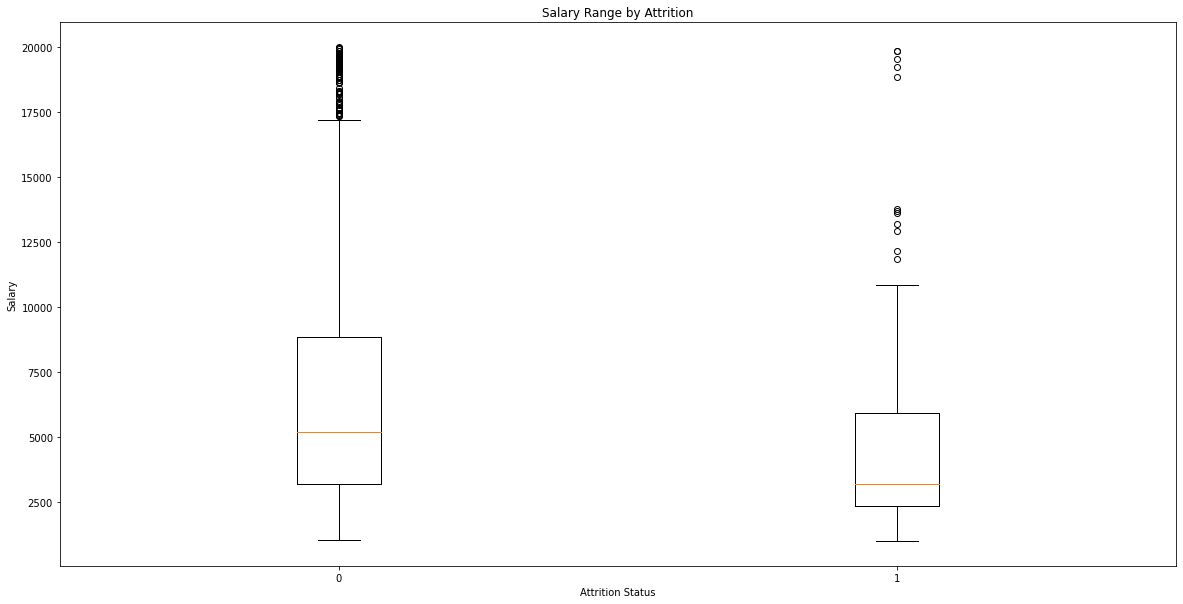

In [9]:
## Create new data frames for plot
graph_df1 = general_df[general_df['Attrition'] == 0]['MonthlyIncome']
graph_df2 = general_df[general_df['Attrition'] == 1]['MonthlyIncome']

## Create box plot
plt.boxplot([graph_df1, graph_df2])

## Add titles and labels
plt.xlabel('Attrition Status')
plt.xticks([1, 2], ['0', '1'])
plt.ylabel('Salary')
plt.title('Salary Range by Attrition')
plt.show()

As we can see, the general salary range is the same regardless of attrition status, however, those who stay in their positions longer have a higher average monthly salary.

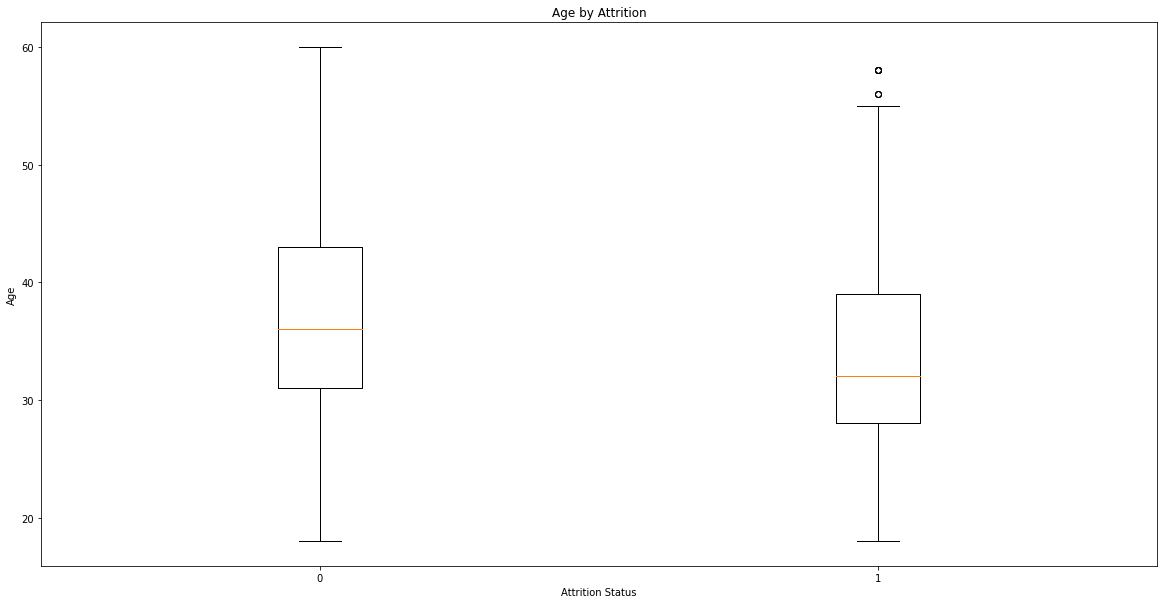

In [10]:
## Create new data frames for plot
graph_df1 = general_df[general_df['Attrition'] == 0]['Age']
graph_df2 = general_df[general_df['Attrition'] == 1]['Age']

## Create box plot
plt.boxplot([graph_df1, graph_df2])

## Add titles and labels
plt.xlabel('Attrition Status')
plt.xticks([1, 2], ['0', '1'])
plt.ylabel('Age')
plt.title('Age by Attrition')
plt.show()

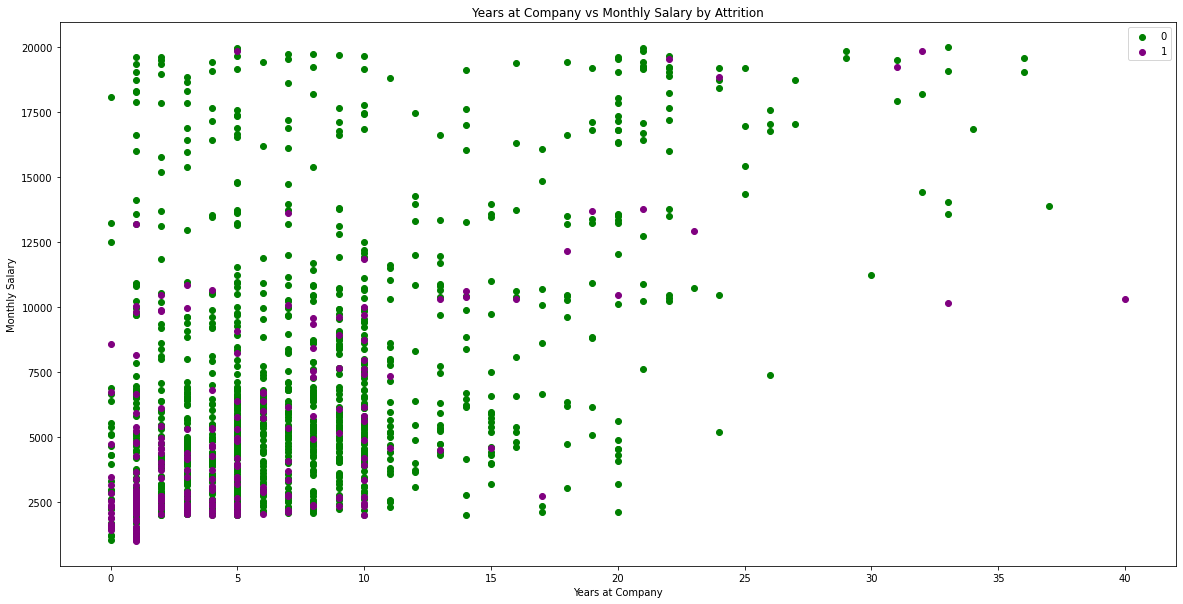

In [11]:
## Create scatter plots for each attrition
plt.scatter(general_df[general_df['Attrition'] == 0]['YearsAtCompany'], general_df[general_df['Attrition'] == 0]['MonthlyIncome'], c='green', label='0')
plt.scatter(general_df[general_df['Attrition'] == 1]['YearsAtCompany'], general_df[general_df['Attrition'] == 1]['MonthlyIncome'], c='purple', label='1')

## Add titles, labels, and legend
plt.title('Years at Company vs Monthly Salary by Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Monthly Salary')
plt.legend()
plt.show()

This scatter plot shows that most employees who leave the company do so within the first 10 years that majority of the time. I was surprised to see the employee who had been at the same company the longest was paid such a mediocre salary comparatively. I was also surprised that the top salaries within the first 5 years were just as high as the 5-40 year range.

### Conclusion

&emsp;From the initial exploration, this dataset seems to contain plenty of relevant information to begin developing models to classify the employees based on the Attrition (binary) variable. As discussed above, I will begin my modeling by using the least amount of variables as possible in hopes that the model is much more portable to other companies / industries. Most of the data contained in this dataset, however, is not company or industry specific, but some of it is very subjective in nature, which could lead to skewed results across different areas and/or cultures. The class imbalance in the data will most certainly need to be dealt with to get better and more accurate results from the model(s). Since this is a basic classification problem, I will be using a multitude of different methods to see which gets the best performance. At this point, I don't see anything hindering my ability to complete this project as originally conceived, but that could very well change during modelling.

### Model Building: No Over- or Undersampling

In [12]:
## Make copy of original data frame
general_df_orig = pd.read_csv(r'C:\Users\michaelzoucha\OneDrive - Bellevue University\DSC 630 - Predictive Analytics\DSC630\Final Project\Data Files\ibm_general_data.csv')

## Make dummy columns out of categorical features
general_df = pd.get_dummies(general_df_orig, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']).drop(columns='EmployeeID')

general_df

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,49,0,279,8,1,1,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
1,33,0,1392,3,4,1,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
2,27,0,591,2,1,1,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
3,32,0,1005,2,2,1,4,79,3,1,...,0,0,0,0,0,0,1,1,1,0
4,59,0,1324,3,3,1,3,81,4,1,...,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,23,1,638,9,3,1,4,33,3,1,...,0,0,0,1,0,1,0,1,1,0
1466,29,1,1092,1,4,1,1,36,3,1,...,0,1,0,0,0,1,0,1,0,1
1467,56,1,310,7,2,1,4,72,3,1,...,0,0,0,0,0,1,0,1,1,0
1468,50,1,878,1,4,1,2,94,3,2,...,0,0,1,0,1,0,0,1,1,0


In [13]:
## Split data into training and test
x_train, x_test, y_train, y_test = model_selection.train_test_split(general_df.drop(columns='Attrition'), general_df['Attrition'], test_size=0.2, random_state=14)

In [14]:
## Build pipeline to find 'best' model/hyperparameter combo
pipeline = Pipeline([('classifier', rfc())])

## Compile search space
## Random forest, logistic regression, multinomial naive bayes, linear support vectors, and k-nearest neighbor can handle binary target
search_space = [{'classifier' : [rfc(n_jobs=-1)], 'classifier__n_estimators' : [10, 100, 1000, 10000], 'classifier__criterion' : ['gini' ,'entropy']},
                {'classifier' : [lr(multi_class='multinomial', max_iter=10000000, random_state=1)], 'classifier__solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga'], 'classifier__penalty' : ['l1', 'l2', 'elasticnet']},
                {'classifier' : [mnb()], 'classifier__alpha' : [0, 1], 'classifier__fit_prior': [True, False]},
                {'classifier' : [lsvc(max_iter=10000000)], 'classifier__penalty' : ['l1', 'l2'], 'classifier__multi_class' : ['ovr', 'crammer_singer']},
                {'classifier' : [knn(n_jobs=-1)], 'classifier__n_neighbors' : [5, 10, 15, 20], 'classifier__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

## Use GridSearch with pipeline and search space to attempt all combinations
classifier = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

## Fit the training data to the grid search
classifier.fit(x_train,y_train)

C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _chec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(n_jobs=-2)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [10, 100, 1000, 10000]},
                         {'classifier': [LogisticRegression(max_iter=10000000,
                                                            multi_class='multinomial',
                                                            random_state=1,
                                                            solver='...
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [0, 1],
                          'classifier__fit_prior': [True, False]},
                         {'classifier': [LinearSVC(max_iter=10000000)],
                          'classifier__

In [15]:
## Print statistics on best model
print("Best Score: " + str(classifier.best_score_))
print('Best Estimator: ' + str(classifier.best_estimator_))
print('Best Parameters: ' + str(classifier.best_params_))

Best Score: 0.8800937612693833
Best Estimator: Pipeline(steps=[('classifier',
                 LogisticRegression(max_iter=10000000,
                                    multi_class='multinomial', random_state=1,
                                    solver='newton-cg'))])
Best Parameters: {'classifier': LogisticRegression(max_iter=10000000, multi_class='multinomial', random_state=1,
                   solver='newton-cg'), 'classifier__penalty': 'l2', 'classifier__solver': 'newton-cg'}


In [89]:
## Print results of all combinations
pd.DataFrame(classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_estimators,param_classifier__penalty,param_classifier__solver,param_classifier__alpha,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035481,2.324508e-03,0.011761,2.128741e-03,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.851695,0.851064,0.863830,0.855319,0.851064,0.854594,0.004882,9
1,0.144317,2.219729e-03,0.027508,2.996634e-03,"RandomForestClassifier(n_estimators=10000, n_j...",gini,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.843220,0.868085,0.851064,0.859574,0.872340,0.858857,0.010702,5
2,1.325700,1.465638e-02,0.168835,1.432762e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.847458,0.859574,0.846809,0.872340,0.876596,0.860555,0.012310,3
3,13.509162,8.841220e-01,1.374128,6.350158e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.851695,0.859574,0.846809,0.868085,0.876596,0.860552,0.010793,4
4,0.053222,9.255141e-03,0.016146,5.363443e-03,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.843220,0.855319,0.838298,0.855319,0.876596,0.853750,0.013240,10
5,0.161260,7.933934e-03,0.032093,3.905769e-03,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.843220,0.859574,0.863830,0.859574,0.855319,0.856304,0.007074,8
6,1.349620,1.041249e-01,0.155081,1.423007e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.847458,0.859574,0.851064,0.868085,0.863830,0.858002,0.007713,7
7,12.711019,6.377872e-02,1.312337,4.281109e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.851695,0.859574,0.846809,0.868085,0.868085,0.858850,0.008571,6
8,0.000399,4.882856e-04,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,newton-cg,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.000997,3.162980e-07,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,lbfgs,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39


Accuracy: 86.73%
Precision: 0.87
Recall: 0.87
F1 score: 0.87

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       241
           1       0.68      0.49      0.57        53

    accuracy                           0.87       294
   macro avg       0.79      0.72      0.75       294
weighted avg       0.86      0.87      0.86       294



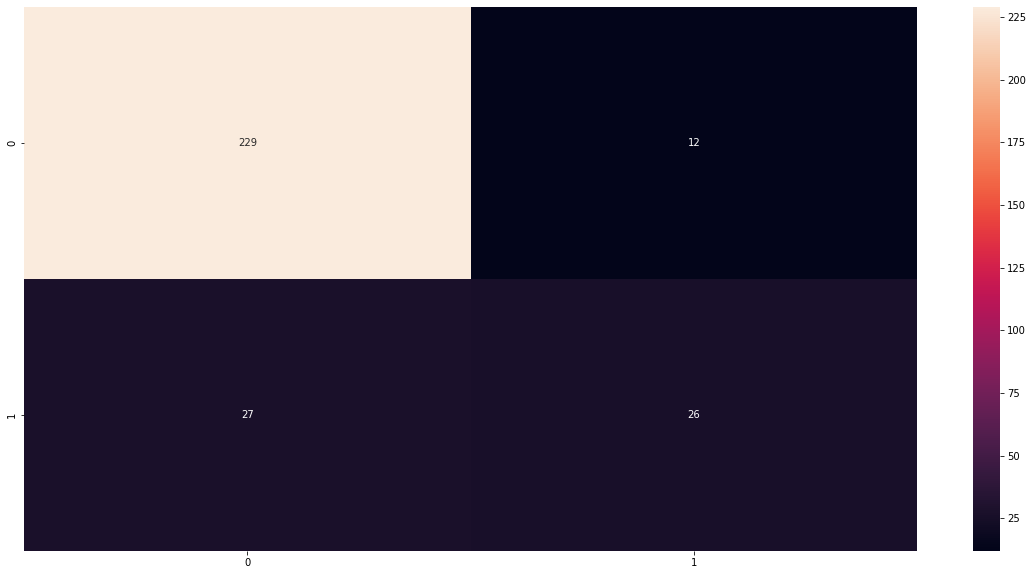

In [17]:
## Make predictions with best model from GridSearchCV
pred = classifier.predict(x_test)

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

### Model Building: Creating Balanced Classes

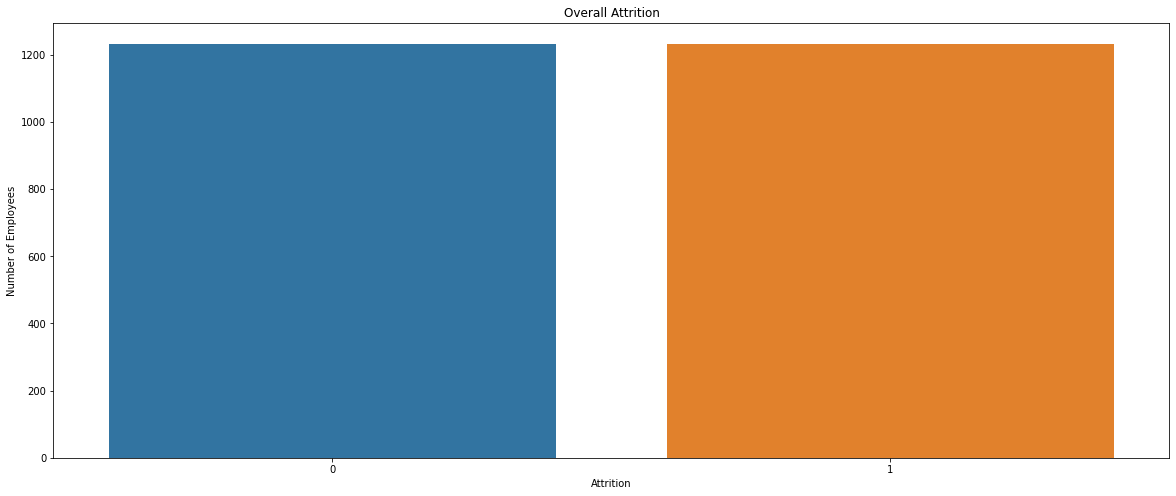

Attrition Rate: 50.0%


In [18]:
x = general_df.drop(columns='Attrition')
y = general_df['Attrition']

oversample = RandomOverSampler(sampling_strategy='minority')
undersample = RandomUnderSampler()

x, y = oversample.fit_resample(x, y)
x, y = undersample.fit_resample(x, y)

general_df_sampled = pd.concat([x, y], join='outer', axis=1)

## Plot size parameter
plt.rcParams['figure.figsize'] = (20, 8)

## Create new data frame for plot
graph_df = pd.DataFrame(y).value_counts().reset_index().set_axis(['attrition', 'count'], axis=1)

## Create bar plot
sn.barplot(data=graph_df, x='attrition', y='count')

## Add titles and labels
plt.xlabel('Attrition')
plt.ylabel('Number of Employees')
plt.title('Overall Attrition')
plt.show()

print("Attrition Rate: " + str(round(((1233/2466) * 100), 1)) + "%")

In [19]:
## Split data into training and test
x_train_sampled, x_test_sampled, y_train_sampled, y_test_sampled = model_selection.train_test_split(general_df_sampled.drop(columns='Attrition'), general_df_sampled['Attrition'], test_size=0.2, random_state=14)

In [ ]:
## Use GridSearch with pipeline and search space to attempt all combinations
classifier2 = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

## Fit the training data to the grid search
classifier2.fit(x_train_sampled,y_train_sampled)

In [21]:
## Print statistics on best model
print("Best Score: " + str(classifier2.best_score_))
print('Best Estimator: ' + str(classifier2.best_estimator_))
print('Best Parameters: ' + str(classifier2.best_params_))

Best Score: 0.9660296857932276
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=10000, n_jobs=-2))])
Best Parameters: {'classifier': RandomForestClassifier(n_estimators=10000, n_jobs=-2), 'classifier__criterion': 'gini', 'classifier__n_estimators': 10000}


In [22]:
## Print results of all combinations
pd.DataFrame(classifier2.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_estimators,param_classifier__penalty,param_classifier__solver,param_classifier__alpha,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027509,7.974268e-04,0.009768,7.460343e-04,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.962025,0.964557,0.954315,0.954315,0.946701,0.956382,0.006340,7
1,0.146510,9.068864e-03,0.056013,1.137088e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.972152,0.939241,0.967005,0.969543,0.969543,0.963497,0.012237,5
2,1.417474,5.252227e-02,0.192769,1.367431e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.974684,0.944304,0.977157,0.969543,0.961929,0.965523,0.011820,2
3,15.012419,7.987110e-01,1.558590,8.842981e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.977215,0.944304,0.977157,0.969543,0.961929,0.966030,0.012248,1
4,0.045050,1.094339e-02,0.016544,5.797805e-03,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.941772,0.926582,0.964467,0.951777,0.979695,0.952859,0.018273,8
5,0.180795,1.342468e-02,0.039269,8.587604e-03,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.974684,0.949367,0.974619,0.949239,0.951777,0.959937,0.012048,6
6,1.535786,3.107681e-01,0.185691,1.106480e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.972152,0.946835,0.974619,0.967005,0.967005,0.965523,0.009801,2
7,14.626896,5.838155e-01,1.583454,8.278011e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.974684,0.944304,0.974619,0.967005,0.959391,0.964001,0.011359,4
8,0.000996,5.091228e-07,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,newton-cg,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.000797,3.985644e-04,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,lbfgs,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


Accuracy: 96.36%
Precision: 0.96
Recall: 0.96
F1 score: 0.96

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       256
           1       0.93      1.00      0.96       238

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.97      0.96      0.96       494



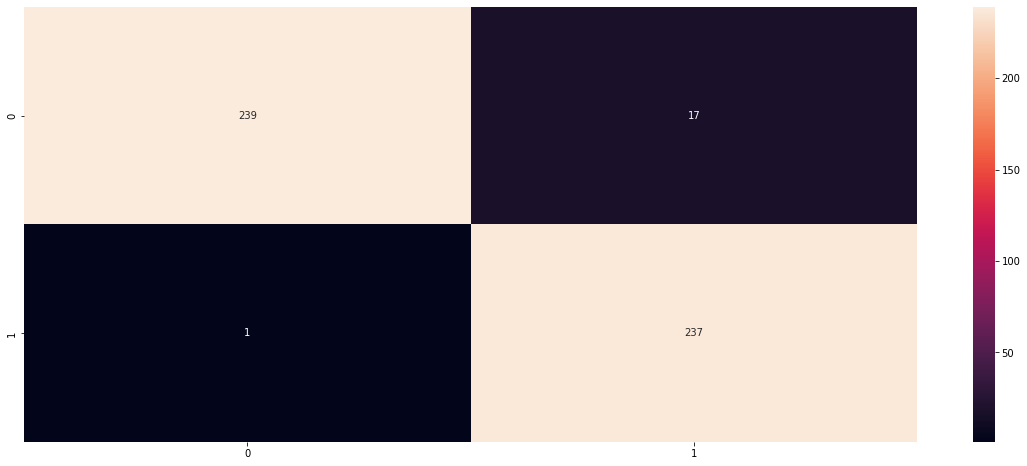

In [23]:
## Make predictions with best model from GridSearchCV
pred = classifier2.predict(x_test_sampled)

## Calculate and print stats
accuracy = accuracy_score(y_test_sampled, pred)
precision = precision_score(y_test_sampled, pred, average='micro')
recall = recall_score(y_test_sampled, pred, average='micro')
f1 = f1_score(y_test_sampled, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test_sampled, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test_sampled, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 98.64%
Precision: 0.99
Recall: 0.99
F1 score: 0.99

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.93      1.00      0.96        53

    accuracy                           0.99       294
   macro avg       0.96      0.99      0.98       294
weighted avg       0.99      0.99      0.99       294



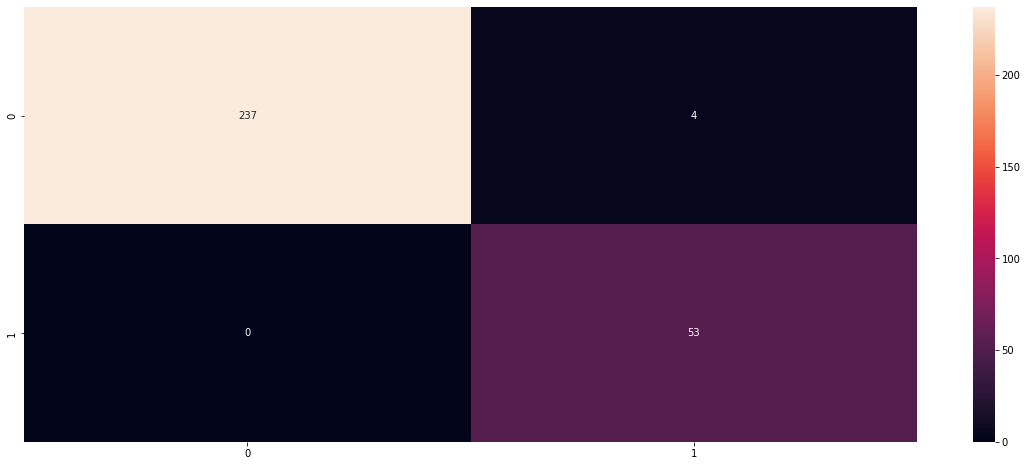

In [24]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier2.predict(x_test)

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

I also found it interesting that my GridSearchCV switched from logistic regression when the training data was imbalanced to random forest when it was not. Training the model on sampled data took the accuracy of predicting the 'true' data from 86.73% to 98.64%, or a 13.73% increase in accuracy, and the f1 score went from 87% to 99%, or a 13.79% increase.

### Automated Feature Reduction

In [25]:
estimator = rfc(criterion='entropy', n_estimators=1000, n_jobs=-1)
selector = feature_selection.RFECV(estimator=estimator, n_jobs=-1)
selector.fit_transform(x_train_sampled, y_train_sampled)
selector.transform(x_test_sampled)
feature_df = selector.get_feature_names_out()

In [26]:
features = list(selector.get_feature_names_out())

Optimal number of features : 39


C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


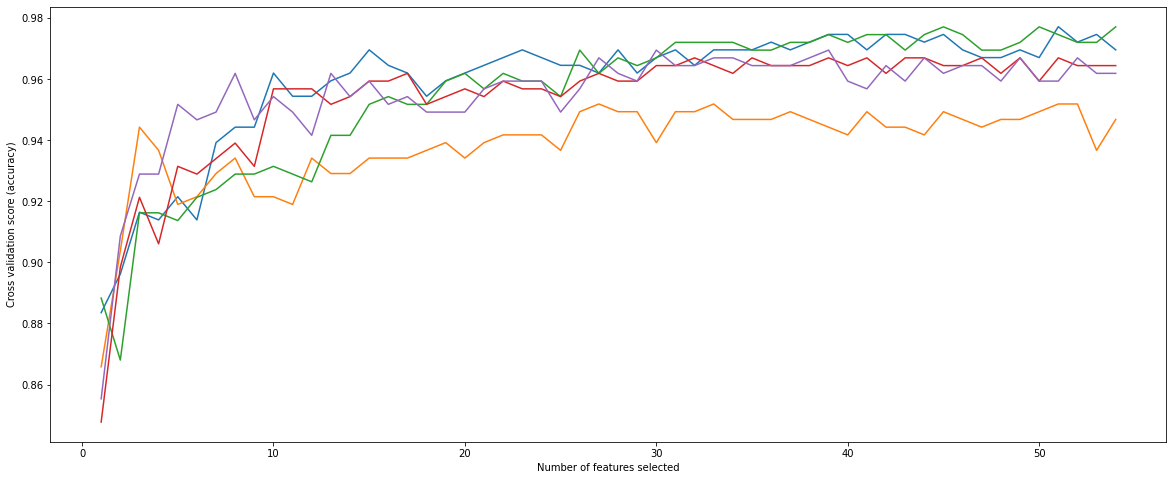

In [27]:
print("Optimal number of features : %d" % selector.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(1, len(selector.grid_scores_) + 1),
    selector.grid_scores_,
)
plt.show()

In [29]:
## Use GridSearch with pipeline and search space to attempt all combinations
classifier3 = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

## Fit the training data to the grid search
classifier3.fit(x_train_sampled[features], y_train_sampled)

C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _chec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(criterion='entropy',
                                                                n_estimators=1000,
                                                                n_jobs=-2)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [10, 100, 1000, 10000]},
                         {'classifier': [LogisticRegression(max_iter=10000000,
                                                            multi_class...
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [0, 1],
                          'classifier__fit_prior': [True, False]},
                         {'classifier': [LinearSVC(max_iter=10000000)],
                          'clas

In [30]:
## Print statistics on best model
print("Best Score: " + str(classifier3.best_score_))
print('Best Estimator: ' + str(classifier3.best_estimator_))
print('Best Parameters: ' + str(classifier3.best_params_))

Best Score: 0.9650157424661054
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', n_estimators=1000,
                                        n_jobs=-2))])
Best Parameters: {'classifier': RandomForestClassifier(criterion='entropy', n_estimators=1000, n_jobs=-2), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 1000}


In [31]:
## Print results of all combinations
pd.DataFrame(classifier3.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_estimators,param_classifier__penalty,param_classifier__solver,param_classifier__alpha,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.058604,3.049343e-03,0.027708,1.057375e-02,"RandomForestClassifier(criterion='entropy', n_...",gini,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.949367,0.939241,0.961929,0.946701,0.941624,0.947772,0.007933,8
1,0.218770,3.917524e-02,0.074652,8.635087e-03,"RandomForestClassifier(criterion='entropy', n_...",gini,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.972152,0.949367,0.972081,0.964467,0.961929,0.963999,0.008371,4
2,1.601215,3.842543e-02,0.166443,4.882924e-03,"RandomForestClassifier(criterion='entropy', n_...",gini,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.974684,0.944304,0.972081,0.964467,0.967005,0.964508,0.010727,2
3,14.481447,1.309645e+00,1.585213,1.041229e-01,"RandomForestClassifier(criterion='entropy', n_...",gini,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.974684,0.944304,0.972081,0.967005,0.961929,0.964001,0.010777,3
4,0.031096,4.519569e-03,0.011162,1.594704e-03,"RandomForestClassifier(criterion='entropy', n_...",entropy,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.959494,0.941772,0.961929,0.956853,0.934010,0.950812,0.010950,7
5,0.156786,4.619686e-03,0.035282,3.654099e-03,"RandomForestClassifier(criterion='entropy', n_...",entropy,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.962025,0.941772,0.967005,0.967005,0.961929,0.959947,0.009362,6
6,1.330404,8.923076e-02,0.173620,2.439232e-02,"RandomForestClassifier(criterion='entropy', n_...",entropy,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.974684,0.944304,0.977157,0.961929,0.967005,0.965016,0.011691,1
7,14.420052,1.025247e+00,1.450847,2.431580e-02,"RandomForestClassifier(criterion='entropy', n_...",entropy,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.969620,0.941772,0.977157,0.964467,0.961929,0.962989,0.011817,5
8,0.000797,3.986361e-04,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,newton-cg,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.000996,4.156970e-07,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,lbfgs,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


Accuracy: 95.95%
Precision: 0.96
Recall: 0.96
F1 score: 0.96

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       256
           1       0.93      1.00      0.96       238

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



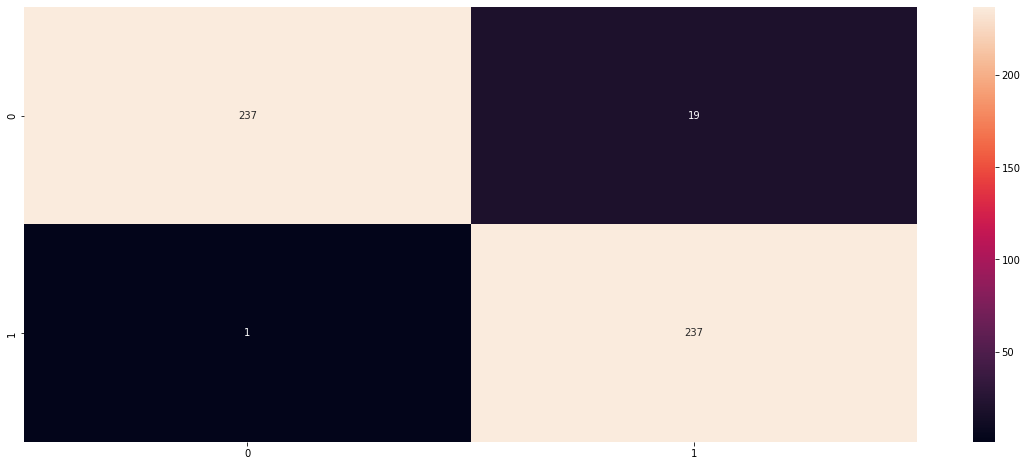

In [32]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier3.predict(x_test_sampled[features])

## Calculate and print stats
accuracy = accuracy_score(y_test_sampled, pred)
precision = precision_score(y_test_sampled, pred, average='micro')
recall = recall_score(y_test_sampled, pred, average='micro')
f1 = f1_score(y_test_sampled, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test_sampled, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test_sampled, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 98.30%
Precision: 0.98
Recall: 0.98
F1 score: 0.98

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.91      1.00      0.95        53

    accuracy                           0.98       294
   macro avg       0.96      0.99      0.97       294
weighted avg       0.98      0.98      0.98       294



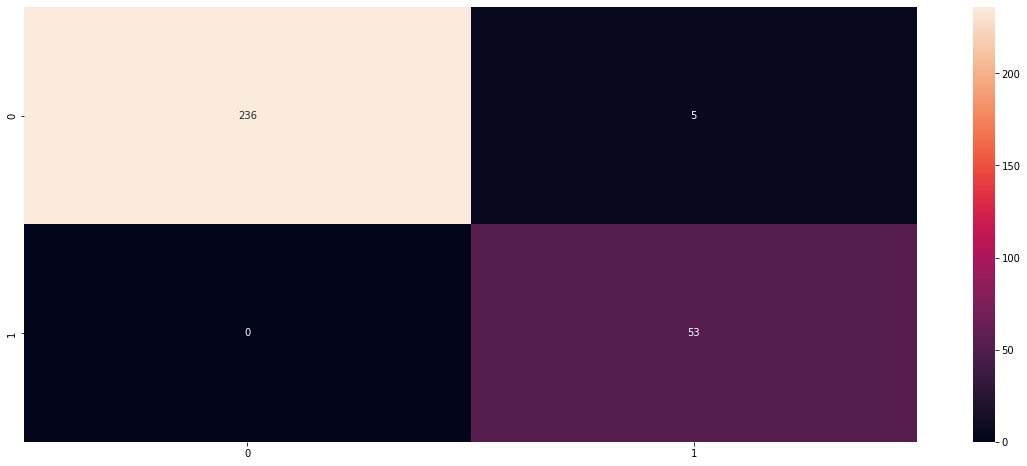

In [33]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier3.predict(x_test[features])

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

### Manual Feature Reduction

In [34]:
## Make copy of original data frame
general_df_orig = pd.read_csv(r'C:\Users\michaelzoucha\OneDrive - Bellevue University\DSC 630 - Predictive Analytics\DSC630\Final Project\Data Files\ibm_general_data _reduced.csv')

## Make dummy columns out of categorical features
general_df = pd.get_dummies(general_df_orig, columns=['BusinessTravel', 'Department', 'MaritalStatus', 'OverTime'])

general_df

,Attrition,Age,DistanceFromHome,Education,JobLevel,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike,...,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,0,49,8,1,2,279,61,5130,24907,23,...,1,0,0,1,0,0,1,0,1,0
1,0,33,3,4,1,1392,56,2909,23159,11,...,1,0,0,1,0,0,1,0,0,1
2,0,27,2,1,1,591,40,3468,16632,12,...,0,1,0,1,0,0,1,0,1,0
3,0,32,2,2,1,1005,79,3068,11864,13,...,1,0,0,1,0,0,0,1,1,0
4,0,59,3,3,1,1324,81,2670,9964,20,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1,23,9,3,1,638,33,1790,26956,19,...,1,0,0,0,1,0,1,0,1,0
1466,1,29,1,4,1,1092,36,4787,26124,14,...,0,1,0,1,0,0,1,0,0,1
1467,1,56,7,2,1,310,72,2339,3666,11,...,0,1,0,1,0,0,1,0,1,0
1468,1,50,1,4,2,878,94,6728,14255,12,...,1,0,0,0,1,1,0,0,1,0


In [35]:
x = general_df.drop(columns='Attrition')
y = general_df['Attrition']

oversample = RandomOverSampler(sampling_strategy='minority')
undersample = RandomUnderSampler()

x, y = oversample.fit_resample(x, y)
x, y = undersample.fit_resample(x, y)

general_df_sampled = pd.concat([x, y], join='outer', axis=1)

In [36]:
## Split data into training and test
x_train_sampled, x_test_sampled, y_train_sampled, y_test_sampled = model_selection.train_test_split(general_df_sampled.drop(columns='Attrition'), general_df_sampled['Attrition'], test_size=0.2, random_state=14)

In [37]:
## Use GridSearch with pipeline and search space to attempt all combinations
classifier4 = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

## Fit the training data to the grid search
classifier4.fit(x_train_sampled, y_train_sampled)

C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _chec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(n_estimators=10000,
                                                                n_jobs=-2)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [10, 100, 1000, 10000]},
                         {'classifier': [LogisticRegression(max_iter=10000000,
                                                            multi_class='multinomial',
                                                            rand...
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [0, 1],
                          'classifier__fit_prior': [True, False]},
                         {'classifier': [LinearSVC(max_iter=10000000)],
                          'classifi

In [38]:
## Print statistics on best model
print("Best Score: " + str(classifier4.best_score_))
print('Best Estimator: ' + str(classifier4.best_estimator_))
print('Best Parameters: ' + str(classifier4.best_params_))

Best Score: 0.9528471374413673
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=10000, n_jobs=-2))])
Best Parameters: {'classifier': RandomForestClassifier(n_estimators=10000, n_jobs=-2), 'classifier__criterion': 'gini', 'classifier__n_estimators': 10000}


In [90]:
## Print results of all combinations
pd.DataFrame(classifier4.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_estimators,param_classifier__penalty,param_classifier__solver,param_classifier__alpha,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.027306,3.232994e-03,0.008770,7.458307e-04,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.921519,0.951899,0.967005,0.959391,0.946701,0.949303,0.015496,5
1,0.146310,1.090694e-02,0.030498,3.707971e-03,"RandomForestClassifier(n_estimators=10000, n_j...",gini,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.944304,0.946835,0.964467,0.956853,0.949239,0.952340,0.007375,2
2,1.373224,8.505892e-02,0.203925,8.960371e-03,"RandomForestClassifier(n_estimators=10000, n_j...",gini,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.936709,0.949367,0.967005,0.959391,0.944162,0.951327,0.010767,3
3,14.654832,1.182334e+00,1.497495,1.172975e-01,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.941772,0.949367,0.961929,0.959391,0.951777,0.952847,0.007228,1
4,0.051228,1.721180e-02,0.016944,3.151252e-03,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.941772,0.921519,0.951777,0.954315,0.944162,0.942709,0.011567,8
5,0.164250,8.720291e-03,0.050432,1.900048e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.931646,0.954430,0.959391,0.959391,0.944162,0.949804,0.010647,4
6,1.340223,4.993482e-02,0.173835,1.096614e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.926582,0.949367,0.967005,0.956853,0.944162,0.948794,0.013504,7
7,13.375831,1.363999e-01,1.505006,4.383093e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.931646,0.949367,0.964467,0.956853,0.944162,0.949299,0.011182,6
8,0.000997,5.917394e-07,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,newton-cg,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.000997,4.909339e-07,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,lbfgs,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


Accuracy: 95.55%
Precision: 0.96
Recall: 0.96
F1 score: 0.96

              precision    recall  f1-score   support

           0       1.00      0.92      0.96       256
           1       0.92      1.00      0.96       238

    accuracy                           0.96       494
   macro avg       0.96      0.96      0.96       494
weighted avg       0.96      0.96      0.96       494



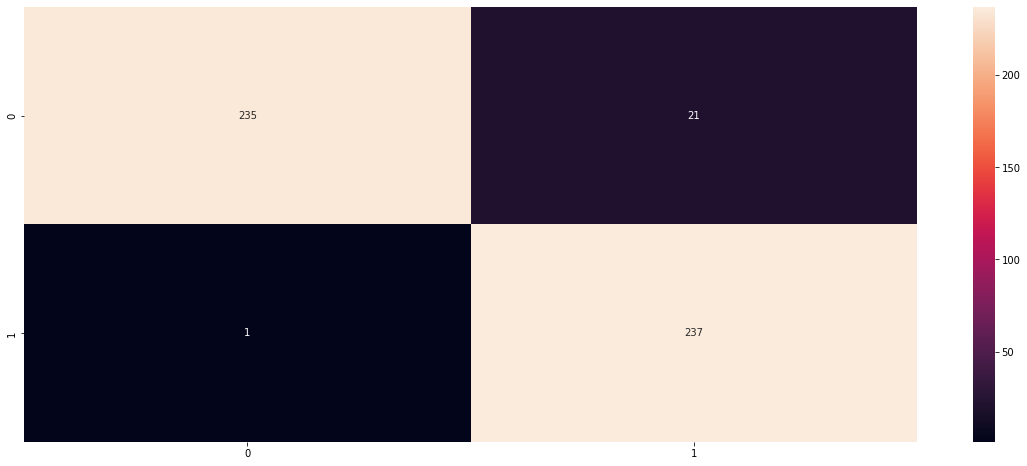

In [40]:
## Make predictions with best model from GridSearchCV
pred = classifier4.predict(x_test_sampled)

## Calculate and print stats
accuracy = accuracy_score(y_test_sampled, pred)
precision = precision_score(y_test_sampled, pred, average='micro')
recall = recall_score(y_test_sampled, pred, average='micro')
f1 = f1_score(y_test_sampled, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test_sampled, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test_sampled, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 97.96%
Precision: 0.98
Recall: 0.98
F1 score: 0.98

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.90      1.00      0.95        53

    accuracy                           0.98       294
   macro avg       0.95      0.99      0.97       294
weighted avg       0.98      0.98      0.98       294



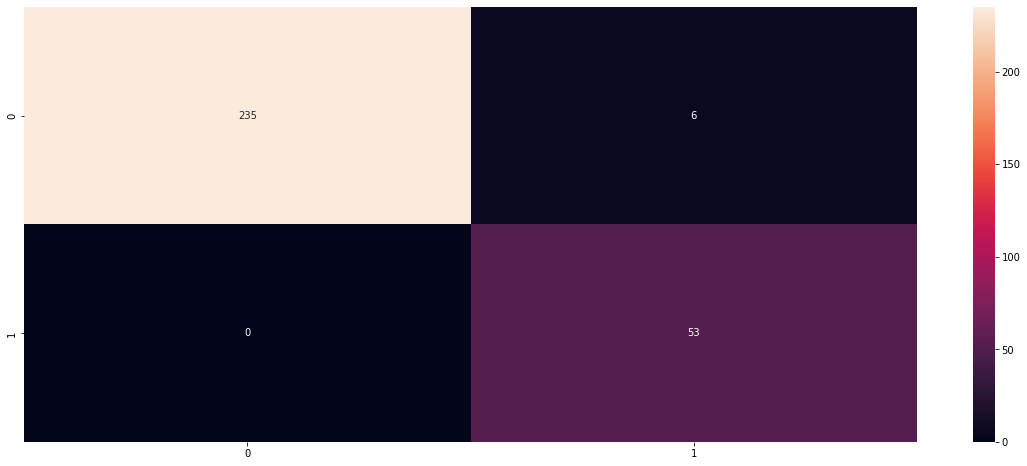

In [41]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier4.predict(x_test[x_test_sampled.columns])

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [42]:
## Make copy of original data frame
general_df_orig = pd.read_csv(r'C:\Users\michaelzoucha\OneDrive - Bellevue University\DSC 630 - Predictive Analytics\DSC630\Final Project\Data Files\ibm_general_data.csv')

## Make dummy columns out of categorical features
general_df = pd.get_dummies(general_df_orig, columns=['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']).drop(columns='EmployeeID')

general_df

print('Removed Columns:\n')
for x in general_df.drop(columns='Attrition').columns:
    if x not in x_test_sampled.columns:
        print(x)

Removed Columns:

EmployeeCount
EnvironmentSatisfaction
JobInvolvement
JobSatisfaction
PerformanceRating
RelationshipSatisfaction
StockOptionLevel
WorkLifeBalance
EducationField_Human Resources
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
Gender_Female
Gender_Male
JobRole_Healthcare Representative
JobRole_Human Resources
JobRole_Laboratory Technician
JobRole_Manager
JobRole_Manufacturing Director
JobRole_Research Director
JobRole_Research Scientist
JobRole_Sales Executive
JobRole_Sales Representative
Over18_Y


In [43]:
## Use GridSearch with pipeline and search space to attempt all combinations
classifier5 = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

## Fit the training data to the grid search
classifier5.fit(x_train_sampled.drop(columns='Age'), y_train_sampled)

C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _chec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(criterion='entropy',
                                                                n_jobs=-2)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [10, 100, 1000, 10000]},
                         {'classifier': [LogisticRegression(max_iter=10000000,
                                                            multi_class='multinomial',
                                                            ran...
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [0, 1],
                          'classifier__fit_prior': [True, False]},
                         {'classifier': [LinearSVC(max_iter=10000000)],
                          'classifi

In [44]:
## Print statistics on best model
print("Best Score: " + str(classifier5.best_score_))
print('Best Estimator: ' + str(classifier5.best_estimator_))
print('Best Parameters: ' + str(classifier5.best_params_))

Best Score: 0.9498065925592754
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', n_jobs=-2))])
Best Parameters: {'classifier': RandomForestClassifier(criterion='entropy', n_jobs=-2), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 100}


In [91]:
## Print results of all combinations
pd.DataFrame(classifier5.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_estimators,param_classifier__penalty,param_classifier__solver,param_classifier__alpha,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022325,2.237015e-03,0.008572,1.016962e-03,"RandomForestClassifier(criterion='entropy', n_...",gini,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.939241,0.934177,0.961929,0.954315,0.944162,0.946765,0.010087,5
1,0.141135,1.276324e-02,0.024717,1.714742e-03,"RandomForestClassifier(criterion='entropy', n_...",gini,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.924051,0.944304,0.959391,0.959391,0.941624,0.945752,0.013131,7
2,1.393678,5.131136e-02,0.183886,1.243924e-02,"RandomForestClassifier(criterion='entropy', n_...",gini,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.936709,0.944304,0.951777,0.956853,0.941624,0.946253,0.007200,6
3,13.829396,7.499886e-01,1.560414,6.385706e-02,"RandomForestClassifier(criterion='entropy', n_...",gini,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.934177,0.944304,0.954315,0.956853,0.946701,0.947270,0.008025,4
4,0.039268,5.517265e-03,0.023322,1.843782e-02,"RandomForestClassifier(criterion='entropy', n_...",entropy,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.921519,0.926582,0.944162,0.956853,0.946701,0.939163,0.013148,8
5,0.156675,8.396074e-03,0.035883,1.917032e-03,"RandomForestClassifier(criterion='entropy', n_...",entropy,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.939241,0.941772,0.969543,0.956853,0.941624,0.949807,0.011682,1
6,1.380522,8.884216e-02,0.223452,9.461821e-02,"RandomForestClassifier(criterion='entropy', n_...",entropy,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.934177,0.944304,0.959391,0.956853,0.944162,0.947777,0.009245,3
7,14.245319,9.794797e-01,1.450674,7.550675e-02,"RandomForestClassifier(criterion='entropy', n_...",entropy,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(criterio...,0.931646,0.941772,0.961929,0.956853,0.946701,0.947780,0.010771,2
8,0.000997,3.504023e-07,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,newton-cg,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.000797,3.986120e-04,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,lbfgs,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


Accuracy: 94.33%
Precision: 0.94
Recall: 0.94
F1 score: 0.94

              precision    recall  f1-score   support

           0       1.00      0.89      0.94       256
           1       0.90      1.00      0.94       238

    accuracy                           0.94       494
   macro avg       0.95      0.95      0.94       494
weighted avg       0.95      0.94      0.94       494



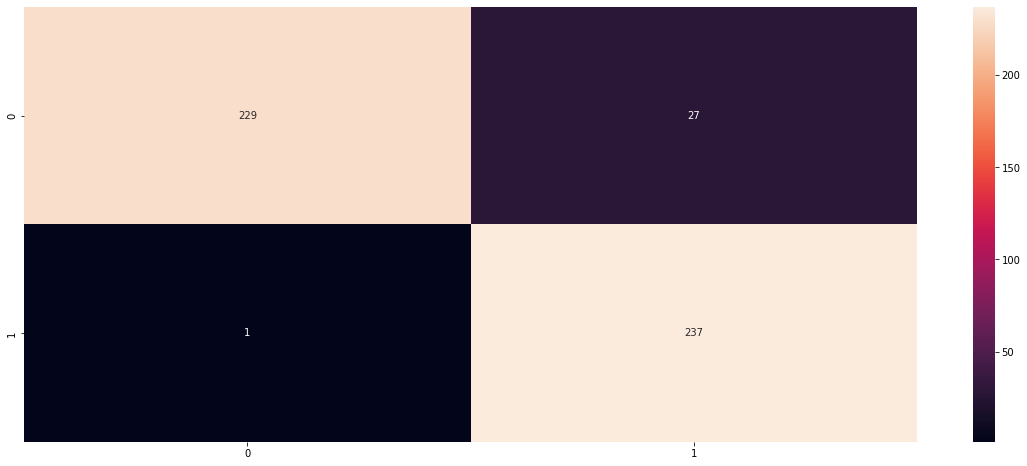

In [45]:
## Make predictions with best model from GridSearchCV
pred = classifier5.predict(x_test_sampled.drop(columns='Age'))

## Calculate and print stats
accuracy = accuracy_score(y_test_sampled, pred)
precision = precision_score(y_test_sampled, pred, average='micro')
recall = recall_score(y_test_sampled, pred, average='micro')
f1 = f1_score(y_test_sampled, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test_sampled, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test_sampled, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 97.96%
Precision: 0.98
Recall: 0.98
F1 score: 0.98

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.90      1.00      0.95        53

    accuracy                           0.98       294
   macro avg       0.95      0.99      0.97       294
weighted avg       0.98      0.98      0.98       294



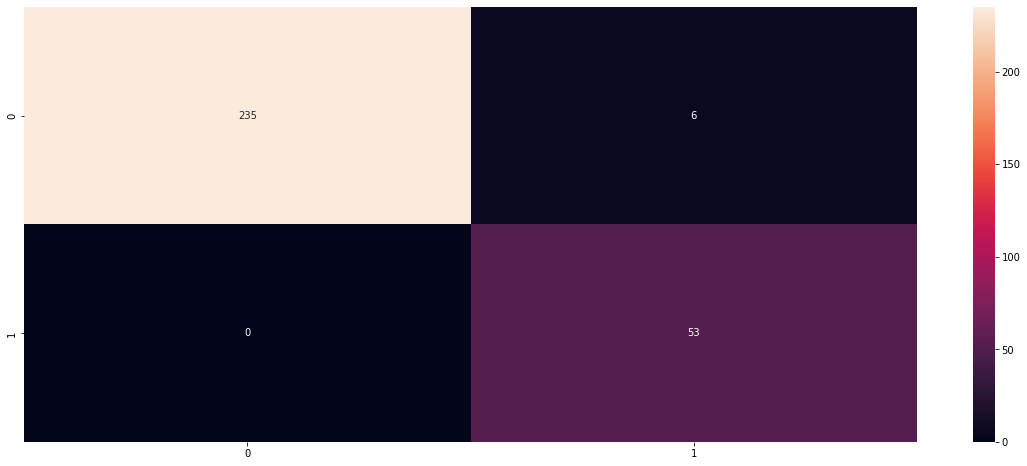

In [46]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier5.predict(x_test[x_test_sampled.drop(columns='Age').columns])

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [63]:
print(x_test_sampled.drop(columns='Age').columns)

Index(['DistanceFromHome', 'Education', 'JobLevel', 'DailyRate', 'HourlyRate',
       'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'NumCompaniesWorked', 'StandardHours', 'TrainingTimesLastYear',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'],
      dtype='object')


In [64]:
## Build pipeline to find 'best' model/hyperparameter combo
pipeline = Pipeline([('classifier', rfc())])

## Compile search space
## Random forest, logistic regression, multinomial naive bayes, linear support vectors, and k-nearest neighbor can handle binary target
search_space = [{'classifier' : [rfc(n_jobs=-1)], 'classifier__n_estimators' : [10, 100, 1000, 10000], 'classifier__criterion' : ['gini' ,'entropy']},
                {'classifier' : [lr(multi_class='multinomial', max_iter=10000000, random_state=1)], 'classifier__solver' : ['newton-cg', 'lbfgs', 'sag' ,'saga'], 'classifier__penalty' : ['l1', 'l2', 'elasticnet']},
                {'classifier' : [mnb()], 'classifier__alpha' : [0, 1], 'classifier__fit_prior': [True, False]},
                {'classifier' : [lsvc(max_iter=10000000)], 'classifier__penalty' : ['l1', 'l2'], 'classifier__multi_class' : ['ovr', 'crammer_singer']},
                {'classifier' : [knn(n_jobs=-1)], 'classifier__n_neighbors' : [5, 10, 15, 20], 'classifier__algorithm' : ['ball_tree', 'kd_tree', 'brute']}]

## Use GridSearch with pipeline and search space to attempt all combinations
classifier6 = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _chec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(criterion='entropy',
                                                                n_jobs=-2)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [10, 100, 1000, 10000]},
                         {'classifier': [LogisticRegression(max_iter=10000000,
                                                            multi_class='multinomial',
                                                            ran...
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [0, 1],
                          'classifier__fit_prior': [True, False]},
                         {'classifier': [LinearSVC(max_iter=10000000)],
                          'classifi

In [65]:
## Print statistics on best model
print("Best Score: " + str(classifier6.best_score_))
print('Best Estimator: ' + str(classifier6.best_estimator_))
print('Best Parameters: ' + str(classifier6.best_params_))

Best Score: 0.9472736618903811
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(criterion='entropy', n_jobs=-2))])
Best Parameters: {'classifier': RandomForestClassifier(criterion='entropy', n_jobs=-2), 'classifier__criterion': 'entropy', 'classifier__n_estimators': 100}


Accuracy: 94.94%
Precision: 0.95
Recall: 0.95
F1 score: 0.95

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       256
           1       0.91      1.00      0.95       238

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



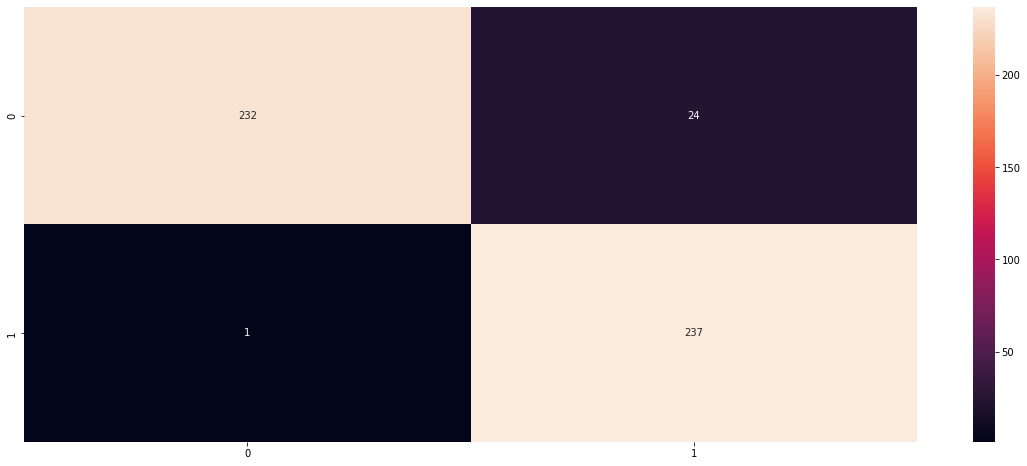

In [66]:
## Make predictions with best model from GridSearchCV
pred = classifier6.predict(x_test_sampled.drop(columns=['Age', 'Department_Sales', 'Department_Research & Development', 'Department_Human Resources']))

## Calculate and print stats
accuracy = accuracy_score(y_test_sampled, pred)
precision = precision_score(y_test_sampled, pred, average='micro')
recall = recall_score(y_test_sampled, pred, average='micro')
f1 = f1_score(y_test_sampled, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test_sampled, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test_sampled, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 98.64%
Precision: 0.99
Recall: 0.99
F1 score: 0.99

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       241
           1       0.93      1.00      0.96        53

    accuracy                           0.99       294
   macro avg       0.96      0.99      0.98       294
weighted avg       0.99      0.99      0.99       294



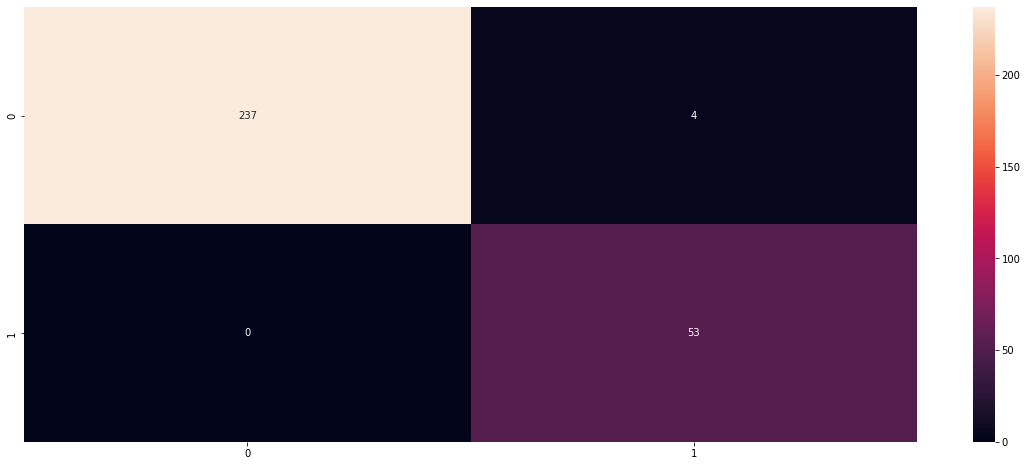

In [67]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier6.predict(x_test[x_test_sampled.drop(columns=['Age', 'Department_Sales', 'Department_Research & Development', 'Department_Human Resources']).columns])

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [69]:
classifier6.feature_names_in_

array(['DistanceFromHome', 'Education', 'JobLevel', 'DailyRate',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'NumCompaniesWorked', 'StandardHours', 'TrainingTimesLastYear',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'], dtype=object)

In [83]:
## Use GridSearch with pipeline and search space to attempt all combinations
classifier7 = GridSearchCV(pipeline, search_space, cv=5, verbose=0, n_jobs=-1)

## Fit the training data to the grid search
classifier7.fit(x_train_sampled.drop(
    columns=['Age', 'Department_Sales', 'Department_Research & Development', 'Department_Human Resources', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']),
                y_train_sampled)

C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\michaelzoucha\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _chec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [RandomForestClassifier(n_estimators=10000,
                                                                n_jobs=-2)],
                          'classifier__criterion': ['gini', 'entropy'],
                          'classifier__n_estimators': [10, 100, 1000, 10000]},
                         {'classifier': [LogisticRegression(max_iter=10000000,
                                                            multi_class='multinomial',
                                                            rand...
                         {'classifier': [MultinomialNB()],
                          'classifier__alpha': [0, 1],
                          'classifier__fit_prior': [True, False]},
                         {'classifier': [LinearSVC(max_iter=10000000)],
                          'classifi

In [84]:
## Print statistics on best model
print("Best Score: " + str(classifier7.best_score_))
print('Best Estimator: ' + str(classifier7.best_estimator_))
print('Best Parameters: ' + str(classifier7.best_params_))

Best Score: 0.9416899055452033
Best Estimator: Pipeline(steps=[('classifier',
                 RandomForestClassifier(n_estimators=10000, n_jobs=-2))])
Best Parameters: {'classifier': RandomForestClassifier(n_estimators=10000, n_jobs=-2), 'classifier__criterion': 'gini', 'classifier__n_estimators': 10000}


In [85]:
## Print results of all combinations
pd.DataFrame(classifier7.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_classifier__criterion,param_classifier__n_estimators,param_classifier__penalty,param_classifier__solver,param_classifier__alpha,...,param_classifier__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032991,1.954583e-03,0.011960,1.667813e-03,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.934177,0.926582,0.941624,0.954315,0.941624,0.939665,0.009204,3
1,0.174119,1.857292e-02,0.061993,8.856092e-03,"RandomForestClassifier(n_estimators=10000, n_j...",gini,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.924051,0.941772,0.949239,0.944162,0.936548,0.939154,0.008585,6
2,1.687594,4.817715e-02,0.293942,3.128052e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.926582,0.936709,0.951777,0.944162,0.939086,0.939663,0.008332,4
3,14.828695,5.155575e-01,1.615447,6.834940e-02,"RandomForestClassifier(n_estimators=10000, n_j...",gini,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.929114,0.941772,0.954315,0.944162,0.939086,0.941690,0.008129,1
4,0.052526,1.173699e-02,0.020332,6.835192e-03,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.906329,0.931646,0.936548,0.944162,0.916244,0.926986,0.013786,8
5,0.191958,3.102523e-02,0.054418,1.057772e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,100,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.924051,0.934177,0.951777,0.949239,0.941624,0.940173,0.010147,2
6,1.849272,2.507893e-01,0.299903,5.285545e-02,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,1000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.918987,0.941772,0.949239,0.946701,0.934010,0.938142,0.010895,7
7,14.938053,9.315530e-01,1.593400,1.485327e-01,"RandomForestClassifier(n_estimators=10000, n_j...",entropy,10000,NaN,NaN,NaN,...,NaN,{'classifier': RandomForestClassifier(n_estima...,0.918987,0.939241,0.954315,0.946701,0.936548,0.939158,0.011835,5
8,0.000399,4.882272e-04,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,newton-cg,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33
9,0.000798,3.987552e-04,0.000000,0.000000e+00,"LogisticRegression(max_iter=10000000, multi_cl...",NaN,NaN,l1,lbfgs,NaN,...,NaN,{'classifier': LogisticRegression(max_iter=100...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34


Accuracy: 94.53%
Precision: 0.95
Recall: 0.95
F1 score: 0.95

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       256
           1       0.90      1.00      0.95       238

    accuracy                           0.95       494
   macro avg       0.95      0.95      0.95       494
weighted avg       0.95      0.95      0.95       494



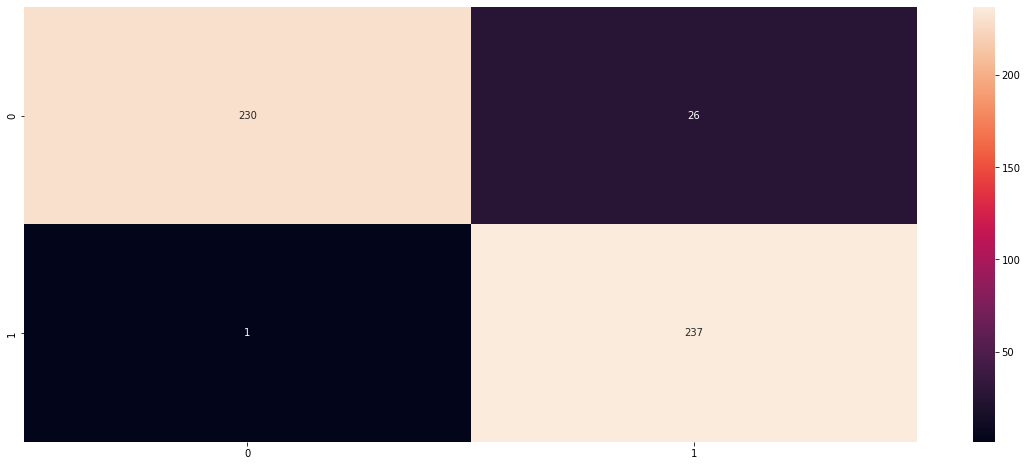

In [86]:
## Make predictions with best model from GridSearchCV
pred = classifier7.predict(x_test_sampled.drop(
    columns=['Age', 'Department_Sales', 'Department_Research & Development', 'Department_Human Resources', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']))

## Calculate and print stats
accuracy = accuracy_score(y_test_sampled, pred)
precision = precision_score(y_test_sampled, pred, average='micro')
recall = recall_score(y_test_sampled, pred, average='micro')
f1 = f1_score(y_test_sampled, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test_sampled, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test_sampled, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

Accuracy: 97.62%
Precision: 0.98
Recall: 0.98
F1 score: 0.98

              precision    recall  f1-score   support

           0       1.00      0.97      0.99       241
           1       0.88      1.00      0.94        53

    accuracy                           0.98       294
   macro avg       0.94      0.99      0.96       294
weighted avg       0.98      0.98      0.98       294



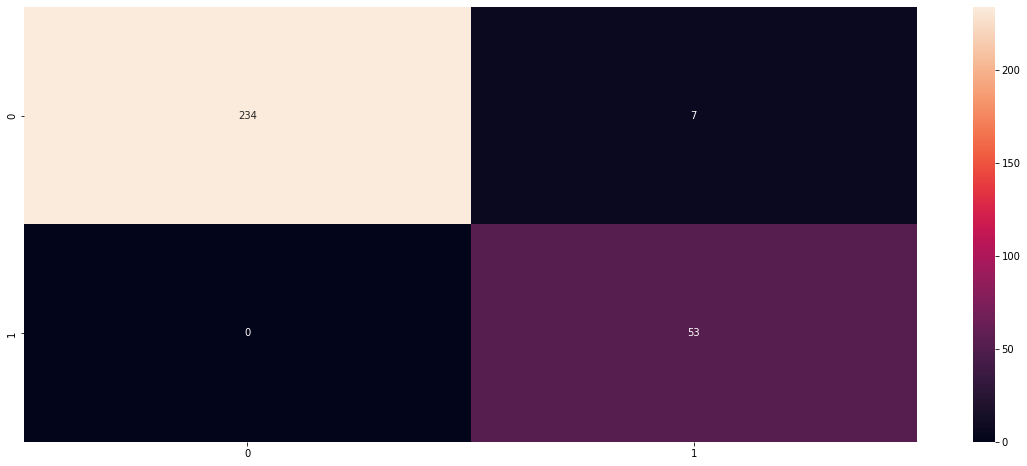

In [87]:
## Make predictions with 'true' data with best model from GridSearchCV
pred = classifier7.predict(x_test[x_test_sampled.drop(
    columns=['Age', 'Department_Sales', 'Department_Research & Development', 'Department_Human Resources', 'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely']).columns])

## Calculate and print stats
accuracy = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
f1 = f1_score(y_test, pred, average='micro')
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 score: {f1:.2f}" + '\n')

## Print classification report
print(classification_report(y_test, pred))

## Create data frame from confusion matrix for heatmap
cm = pd.DataFrame(confusion_matrix(y_test, pred))

## Visualize confusion matrix in a heat map
sn.heatmap(cm, annot=True, fmt='g')
plt.show()

In [88]:
classifier7.feature_names_in_

array(['DistanceFromHome', 'Education', 'JobLevel', 'DailyRate',
       'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'PercentSalaryHike',
       'NumCompaniesWorked', 'StandardHours', 'TrainingTimesLastYear',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'OverTime_No', 'OverTime_Yes'],
      dtype=object)

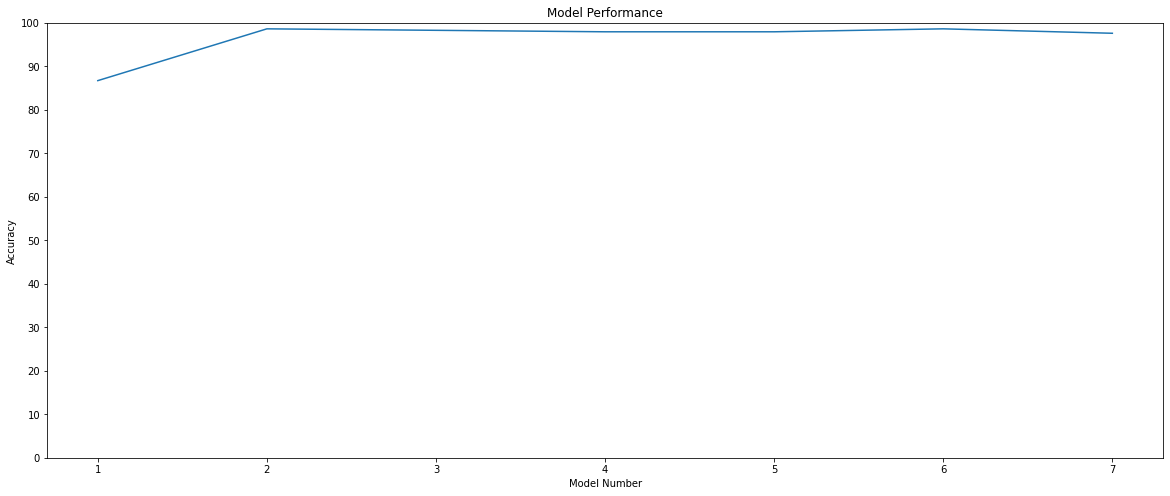

In [96]:
scores = [86.73, 98.64, 98.3, 97.96, 97.96, 98.64, 97.62]
model_num = [1, 2, 3, 4, 5, 6, 7]

scores_df = pd.DataFrame({'model_num': model_num, 'score': scores})
plt.plot(scores_df['model_num'], scores_df['score'])
plt.xlabel('Model Number')
plt.ylabel('Accuracy')
plt.title('Model Performance')
plt.xticks(ticks=[1,2,3,4,5,6,7])
plt.yticks(ticks=[0,10,20,30,40,50,60,70,80,90,100])
plt.show()

### Modeling Conclusions

&emsp;My initial model was not terrible at around 86.7% accuracy, but I was able to increase it to nearly 99% by using a combination of over- and under-sampling to create balanced target classes. My next goal was to remove as many features as possible in order to make the model more 'portable' between companies and organizations. First, I removed the subjective 'survey' scores since everyone scores them differently. Then I removed the US protected classes (age and sex) to ensure the model wasn't discriminating against a particular group. After removing all the features I wanted, I was able to still retain a 97.62% accuracy, or approximately a 1% loss in overall performance. Since the final model I chose was a random forest, there isn't a lot of insight into which of the features is considered a heavier weight than others. I did find it interesting the recursive feature elimation only elimated 2 features, while I was able to remove more than half of them with almost the same accuracy.